# Akademi (Flatiron School) — Data Science & AI, Cohorte 2025

**Fourth Project** – Phase 4  
**Student Name:** Micka LOUIS  
**Student Pace:** Self-paced  
**Submission Deadline:** September 28, 2025  
**Instructors' Names:** Wedter JEROME & Geovany Batista Polo LAGUERRE  
**Blog Post URL:**  https://github.com/Micka-Louis/ds-project-phase-4.git

# Project Title

## Measuring Public Perception of Apple and Google on Twitter with Machine Learning
![Cover](images/imag1.webp)

# Overview
In today’s tech landscape, public sentiment significantly influences the strategies and brand perception of industry leaders like Apple and Google. This project analyzes Twitter data to understand how users express their opinions about these companies and their products. Both Apple and Google have a massive global footprint, with business performance and public perception closely tied to product launches and technological developments. For instance, Apple generated over 300 billion USD in revenue last year, while Alphabet, Google’s parent company, reported revenues exceeding 181 billion USD. By analyzing and interpreting public sentiment on social media, this study aims to provide actionable insights that can guide marketing decisions, product improvements, and overall brand strategy.

# Business Understanding & Business Problem
![Cover](images/imag2.jpg)
**Business Understanding**  
Public sentiment on social media is a critical factor for technology companies like Apple and Google. Understanding how users perceive products and services can influence marketing strategies, product development, and overall brand reputation. Positive sentiment can drive sales and brand loyalty, while negative sentiment may highlight areas for improvement or potential risks to the brand image.

**Business Problem**  
Both Apple and Google face an important strategic question:  
➡️ Can we analyze Twitter data to identify how customers feel about their products and detect trends in sentiment over time?

An effective sentiment analysis model will allow the business to:  
- Monitor public perception of specific products in real time.  
- Identify areas of concern or potential product improvements based on negative sentiment.  
- Inform marketing campaigns and communication strategies to strengthen brand loyalty.  
- Support data-driven decision making in product launches and customer engagement initiatives.


# Data Understanding

The dataset used for this project consists of over 9,000 tweets mentioning Apple and Google products. Each tweet has been labeled by human annotators to indicate the sentiment expressed towards a brand or product. The labels include:

- **Positive emotion**: The tweet expresses a positive opinion or satisfaction with the product.  
- **Negative emotion**: The tweet expresses dissatisfaction or criticism.  
- **Neutral / No emotion**: The tweet does not express a clear positive or negative sentiment.

The dataset includes the following key columns:

- `tweet_text`: The full text content of the tweet, which serves as the main explanatory feature for sentiment analysis.  
- `emotion_in_tweet_is_directed_at`: The specific brand or product referenced in the tweet (e.g., iPhone, iPad, Google).  
- `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment label assigned to the tweet (Positive, Negative, Neutral).

This dataset is well-suited for the business problem because it provides real user feedback on social media, capturing opinions in a natural and unstructured format. By analyzing this data, we can identify trends in public sentiment, detect product-specific issues, and derive actionable insights for Apple and Google marketing and product strategies.


## Stakeholder / Audience

The primary stakeholders for this project are the marketing, product, and customer experience teams at Apple and Google. These teams are responsible for:

- Monitoring public perception of their products and services.
- Identifying areas for improvement based on customer feedback.
- Designing marketing campaigns that resonate with users.
- Making data-driven decisions for product development and brand strategy.

The audience for this analysis includes both technical and non-technical team members:

- **Technical audience**: Data analysts and data scientists who will use the model outputs to explore deeper insights, run additional analyses, or integrate the results into dashboards.
- **Non-technical audience**: Marketing managers, product managers, and executives who require clear, actionable insights to inform strategic decisions without needing to understand the underlying algorithms.

By targeting both audiences, the project ensures that the insights derived from Twitter sentiment analysis are both actionable and understandable, supporting better decision-making across the organization.


## 1.1 Importing Required Libraries

In [2]:
# Core & utilities
import time
import re
import joblib
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP (Natural Language Processing)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Scikit-learn: preprocessing, feature extraction, and model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Scikit-learn: models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-learn: metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from xgboost import XGBClassifier

In [3]:
# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1.2 Loading the data

In [12]:
df = pd.read_csv("data/tweets.csv", encoding="latin-1")

## Initial Exploration and Data Quality Assessment

In [13]:
#Display the first 5 rows of the dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [14]:
#Display the names of all available columns in the DataFrame
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [15]:
#Display the number of rows and columns in the dataset
df.shape

(9093, 3)

In [16]:
# getting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [17]:
df['tweet_text'].head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

# Data Cleaning

In this step, we prepare the dataset by removing unnecessary information, handling missing values, and making the data ready for analysis and modeling. The main steps are:

1. **Dropping unwanted columns**  
   - Remove irrelevant columns such as `emotion_in_tweet_is_directed_at` that do not add value to the analysis.  

2. **Handling missing values**  
   - Drop rows with missing values in the sentiment column.  
   - Fill missing values in other columns with placeholders if necessary.  

3. **Renaming columns and sentiment categories**  
   - Rename long column names to shorter, more intuitive ones (e.g., `is_there_an_emotion_directed_at_a_brand_or_product` → `sentiment`).  
   - Standardize sentiment labels (`No emotion toward brand or product` → `neutral`, etc.).  

4. **Removing unwanted categories**  
   - Drop rows where the sentiment is `I can't tell` since it does not provide useful information for the model.  

5. **Cleaning text data**  
   - Convert text to lowercase.  
   - Remove URLs, numbers, punctuation, and extra spaces.  
   - Ensure the text is consistent and ready for vectorization.  

6. **Text vectorization**  
   - Transform the cleaned text into numerical format using techniques like:  
     - **Bag of Words (CountVectorizer)**  
     - **TF-IDF (TfidfVectorizer)**  


In [18]:

# === Data Cleaning & Preprocessing Pipeline ===

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Drop unnecessary column
df = df.drop(columns=['emotion_in_tweet_is_directed_at'], errors='ignore')

# Handle missing values
df = df.dropna(subset=['is_there_an_emotion_directed_at_a_brand_or_product'])
df.fillna("Unknown", inplace=True)

# Rename target column
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)

# Standardize sentiment labels
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()
df['sentiment'] = df['sentiment'].replace({
    'no emotion toward brand or product': 'neutral',
    'positive emotion': 'positive',
    'negative emotion': 'negative',
    "i can't tell": 'unknown'
})

# Remove "unknown" category
df = df[df['sentiment'] != 'unknown']

# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)            # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)            # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)                  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()              # remove extra spaces
    return text

# Apply cleaning
df['text_clean'] = df['tweet_text'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['text_clean'] = df['text_clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Tokenization
df['tokens'] = df['text_clean'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens_lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Reconstruct final text for vectorization
df['text_final'] = df['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Vectorization - Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text_final'])

# Vectorization - TF-IDF (recommended)
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['text_final'])

# Define features and target
X = X_tfidf
y = df['sentiment']

# Check final cleaned dataset
print(df[['tweet_text', 'sentiment', 'text_final']].head())
print("\nSentiment distribution:\n", y.value_counts(normalize=True))


                                          tweet_text sentiment  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  negative   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  positive   
2  @swonderlin Can not wait for #iPad 2 also. The...  positive   
3  @sxsw I hope this year's festival isn't as cra...  negative   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  positive   

                                          text_final  
0  g iphone hr tweeting dead need upgrade plugin ...  
1  know awesome ipadiphone app youll likely appre...  
2                                     wait also sale  
3     hope year festival isnt crashy year iphone app  
4  great stuff fri marissa mayer google tim oreil...  

Sentiment distribution:
 sentiment
neutral     0.602999
positive    0.333221
negative    0.063780
Name: proportion, dtype: float64


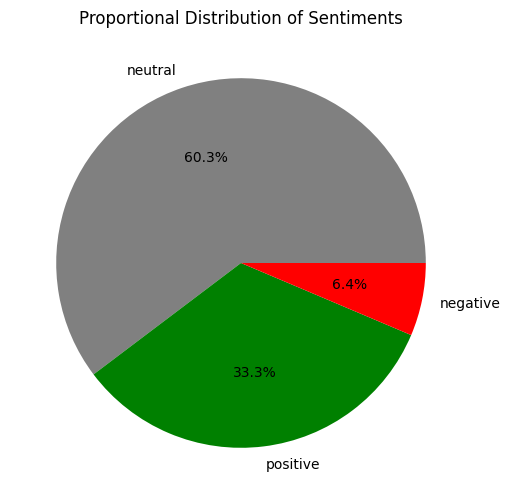

In [19]:
# Pie chart showing the proportional distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['gray', 'green', 'red'])
plt.title('Proportional Distribution of Sentiments')
#plt.savefig("tweet_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

### Interpretation of the Sentiment Pie Chart

The pie chart represents the **proportional distribution of sentiments** expressed in the tweets:

- **Neutral (60.3%)**: The majority of tweets do not express a strong opinion toward a brand or product. This indicates that most users are indifferent or simply sharing information without an emotional stance.  
- **Positive (33.3%)**: About one-third of the tweets show a favorable sentiment. This reflects a significant portion of users expressing satisfaction or liking toward the brand/product.  
- **Negative (6.4%)**: Only a small fraction of tweets convey negative emotions. This suggests that few users express dissatisfaction or dislike.

**Overall**, the chart shows that most users are **neutral or positive**, with very few negative reactions. This insight can help marketers understand general consumer sentiment and focus on strategies to increase positive engagement while monitoring the small negative feedback.


# 📊 Word Cloud Visualization by Sentiment

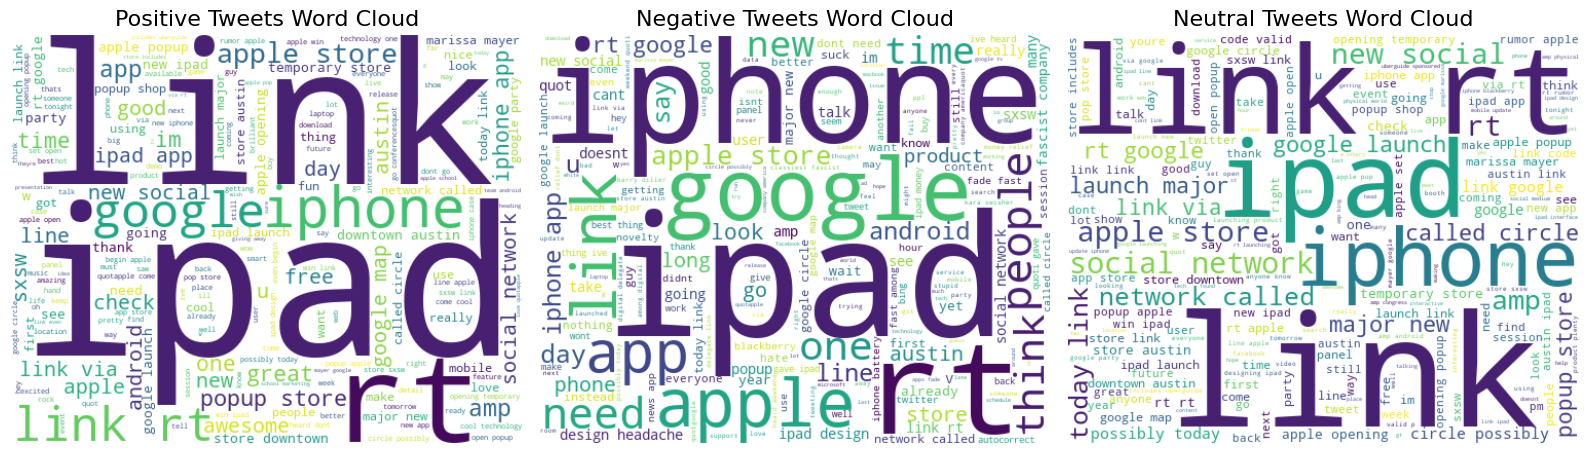

In [20]:
# Separate tweets by sentiment
pos_tweets = df[df['sentiment'] == 'positive']['text_final']
neg_tweets = df[df['sentiment'] == 'negative']['text_final']
neut_tweets = df[df['sentiment'] == 'neutral']['text_final']

# Drop missing values and convert to string
pos_tweets = pos_tweets.dropna().astype(str)
neg_tweets = neg_tweets.dropna().astype(str)
neut_tweets = neut_tweets.dropna().astype(str)

# Create a figure for the word clouds
plt.figure(figsize=(16, 8))

# Function to create and display a word cloud
def generate_word_cloud_subplot(text, title, position):
    wordcloud = WordCloud(width=500, height=400, background_color='white', random_state=42).generate(' '.join(text))
    plt.subplot(1, 3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')

# Generate word clouds for each sentiment
generate_word_cloud_subplot(pos_tweets, 'Positive Tweets Word Cloud', 1)
generate_word_cloud_subplot(neg_tweets, 'Negative Tweets Word Cloud', 2)
generate_word_cloud_subplot(neut_tweets, 'Neutral Tweets Word Cloud', 3)

# Display layout
plt.tight_layout()
#plt.savefig("word_cloud.png", dpi=300, bbox_inches='tight')
plt.show()


# 📏 Checking Tweet Lengths by Sentiment Category

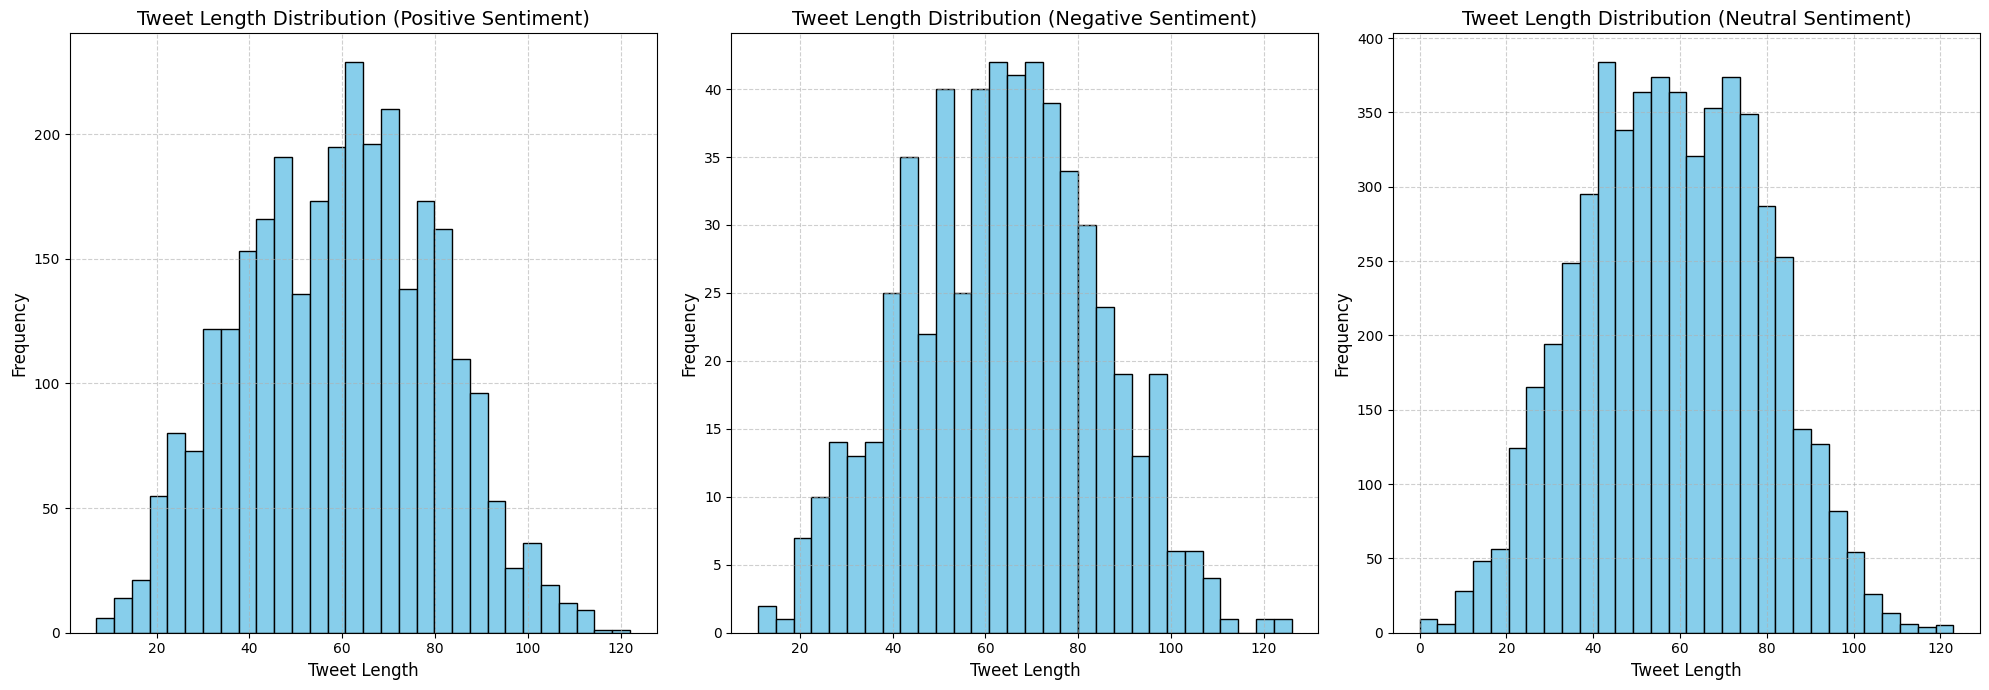

In [21]:
# Filter tweets by sentiment category
positive_tweets = df[df['sentiment'] == 'positive']['text_final']
negative_tweets = df[df['sentiment'] == 'negative']['text_final']
neutral_tweets = df[df['sentiment'] == 'neutral']['text_final']

# Drop missing values and ensure text type
positive_tweets = positive_tweets.dropna().astype(str)
negative_tweets = negative_tweets.dropna().astype(str)
neutral_tweets = neutral_tweets.dropna().astype(str)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Function to plot tweet length histograms
def plot_tweet_length_histograms(tweets, sentiment_label, ax):
    tweet_lengths = tweets.str.len()
    
    ax.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel('Tweet Length', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Tweet Length Distribution ({sentiment_label.capitalize()} Sentiment)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)

# Plot histograms for each sentiment category
plot_tweet_length_histograms(positive_tweets, 'positive', axes[0])
plot_tweet_length_histograms(negative_tweets, 'negative', axes[1])
plot_tweet_length_histograms(neutral_tweets, 'neutral', axes[2])

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()


### 🧩 Interpretation of Tweet Length Distribution by Sentiment

The histograms above illustrate the distribution of tweet lengths across **positive**, **negative**, and **neutral** sentiment categories.

- **Positive Tweets**:  
  These tweets tend to have a moderate length, mostly ranging between 40 and 80 characters.  
  This suggests that users expressing positive emotions often share concise but clear feedback about Apple or Google products.

- **Negative Tweets**:  
  Negative tweets are slightly shorter on average. This indicates that users expressing dissatisfaction tend to post short, direct messages — possibly driven by frustration or immediate reactions.

- **Neutral Tweets**:  
  Neutral tweets display a slightly wider distribution, including some longer tweets. These messages might contain factual information, news, or neutral discussions that require more context or detail.

Overall, the three categories follow a roughly normal distribution, but **positive and neutral tweets are generally longer** than negative ones.  
This observation can be useful for **feature engineering**, as tweet length may contribute to the model’s ability to predict sentiment.


# Modeling

## Model 1 — Logistic Regression (Baseline)

**Why Logistic Regression?**  
Logistic Regression (LR) is a strong and interpretable baseline for text classification problems. It is fast to train, handles high-dimensional sparse inputs (TF-IDF) well, and its coefficients can be inspected to understand which tokens drive predictions.  

**What we do in this cell:**  
- Build a pipeline that applies TF-IDF to the preprocessed text (`text_final`) and standard scales numeric features (tweet length, word count, etc.).  
- Use `StratifiedKFold` cross-validation with `GridSearchCV` to tune regularization strength (`C`) and penalty.  
- Evaluate on a stratified hold-out test set using `f1_macro` (robust to class imbalance).  
- Save the best LR model for later comparison.

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\asus\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV finished in 949.9s
Best params: {'clf__C': 5.0, 'clf__penalty': 'l1'}
Best CV f1_macro: 0.5552506126328092

Test accuracy: 0.6639 | Test macro F1: 0.5820

Classification report:

              precision    recall  f1-score   support

    negative       0.35      0.51      0.42       114
     neutral       0.76      0.72      0.74      1078
    positive       0.59      0.59      0.59       596

    accuracy                           0.66      1788
   macro avg       0.57      0.61      0.58      1788
weighted avg       0.68      0.66      0.67      1788



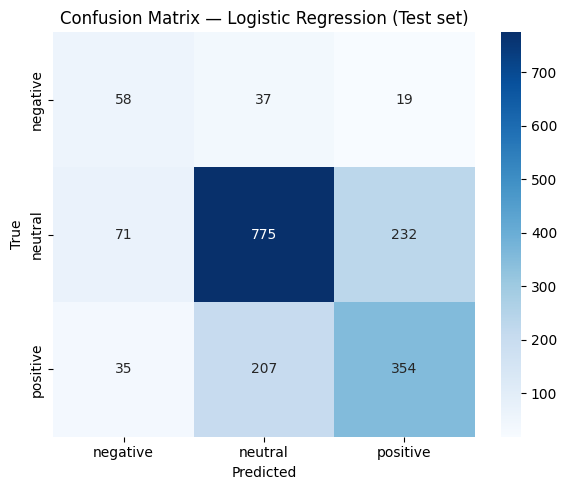

In [23]:
RANDOM_STATE = 42

# --- Sanity checks and feature creation (idempotent) ---
assert 'text_final' in df.columns, "Column 'text_final' not found in df"
assert 'sentiment' in df.columns, "Column 'sentiment' not found in df"

# Create numeric features
df = df.copy()
df['text_final'] = df['text_final'].astype(str)
if 'tweet_length' not in df.columns:
    df['tweet_length'] = df['text_final'].str.len()
if 'num_words' not in df.columns:
    df['num_words'] = df['text_final'].str.split().map(len)
# If original raw text exists, create counts; otherwise defaults
if 'tweet_text' in df.columns:
    if 'num_hashtags' not in df.columns:
        df['num_hashtags'] = df['tweet_text'].astype(str).str.count(r'#\w+')
    if 'num_mentions' not in df.columns:
        df['num_mentions'] = df['tweet_text'].astype(str).str.count(r'@\w+')
    if 'num_exclamations' not in df.columns:
        df['num_exclamations'] = df['tweet_text'].astype(str).str.count('!')
    if 'has_url' not in df.columns:
        df['has_url'] = df['tweet_text'].astype(str).str.contains(r'http\S+|www\S+', regex=True).astype(int)
else:
    # fallback
    for c in ['num_hashtags', 'num_mentions', 'num_exclamations', 'has_url']:
        if c not in df.columns:
            df[c] = 0

numeric_features = ['tweet_length', 'num_words', 'num_hashtags', 'num_mentions', 'num_exclamations', 'has_url']

# --- Prepare X and y ---
X = df[['text_final'] + numeric_features]
y = df['sentiment'].astype(str)
le = LabelEncoder()
y_enc = le.fit_transform(y)  # keep 'le' to map back

# --- Train/test split (stratified) ---
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_enc, test_size=0.2, random_state=RANDOM_STATE, stratify=y_enc
)

# --- Preprocessing pipeline ---
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf, 'text_final'),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='drop'
)

# --- Pipeline + model (Logistic Regression) ---
pipe_lr = Pipeline([
    ('preproc', preprocessor),
    ('clf', LogisticRegression(solver='saga', max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE))
])

# --- Hyperparameter grid (small & reasonable) ---
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1.0, 5.0],
    'clf__penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

gs_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# --- Fit (Grid Search) ---
t0 = time.time()
gs_lr.fit(X_train, y_train_enc)
t1 = time.time()
print(f"GridSearchCV finished in {t1-t0:.1f}s")
print("Best params:", gs_lr.best_params_)
print("Best CV f1_macro:", gs_lr.best_score_)

best_lr = gs_lr.best_estimator_

# --- Evaluate on the hold-out test set ---
y_pred_lr = best_lr.predict(X_test)
acc = accuracy_score(y_test_enc, y_pred_lr)
f1_macro_val = f1_score(y_test_enc, y_pred_lr, average='macro')
print(f"\nTest accuracy: {acc:.4f} | Test macro F1: {f1_macro_val:.4f}\n")
print("Classification report:\n")
print(classification_report(y_test_enc, y_pred_lr, target_names=le.classes_))

# Confusion matrix plot
cm = confusion_matrix(y_test_enc, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — Logistic Regression (Test set)')
plt.tight_layout()
plt.show()

## Model 2- RANDOM FOREST CLASSIFIER — Sentiment Analysis


Random Forest Test Accuracy: 0.6773 | Macro F1: 0.5168

Classification Report (Random Forest):

              precision    recall  f1-score   support

    negative       0.65      0.18      0.28       114
     neutral       0.69      0.87      0.77      1078
    positive       0.62      0.42      0.50       596

    accuracy                           0.68      1788
   macro avg       0.65      0.49      0.52      1788
weighted avg       0.67      0.68      0.65      1788



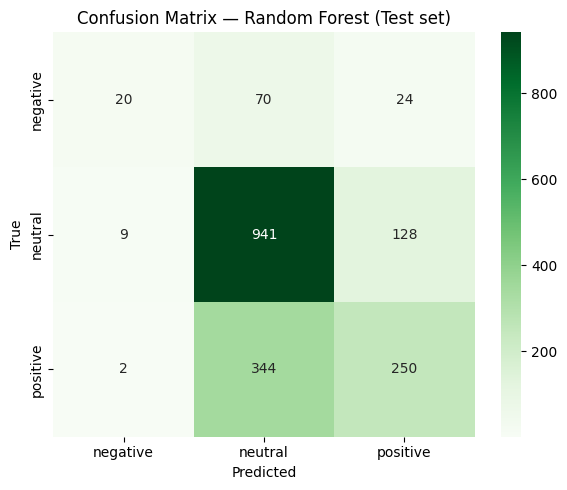

In [22]:
# --- Step 1: Transform features using the same preprocessor (TF-IDF + numeric scaling) ---
preprocessor.fit(X_train)
X_train_tfidf = preprocessor.transform(X_train)
X_test_tfidf = preprocessor.transform(X_test)

# --- Step 2: Initialize Random Forest model ---
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    class_weight='balanced'   # helps when classes are imbalanced
)

# --- Step 3: Train the model ---
rf_classifier.fit(X_train_tfidf, y_train_enc)

# --- Step 4: Predictions ---
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# --- Step 5: Evaluation ---
acc_rf = accuracy_score(y_test_enc, y_pred_rf)
f1_rf = f1_score(y_test_enc, y_pred_rf, average='macro')

print(f"\nRandom Forest Test Accuracy: {acc_rf:.4f} | Macro F1: {f1_rf:.4f}\n")
print("Classification Report (Random Forest):\n")
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

# --- Step 6: Confusion Matrix ---
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — Random Forest (Test set)')
plt.tight_layout()
plt.show()


## Model 3---SVM Classifier


SVM Test Accuracy: 0.6577 | Macro F1: 0.5795

Classification Report (SVM):

              precision    recall  f1-score   support

    negative       0.32      0.55      0.41       114
     neutral       0.78      0.69      0.73      1078
    positive       0.58      0.62      0.60       596

    accuracy                           0.66      1788
   macro avg       0.56      0.62      0.58      1788
weighted avg       0.68      0.66      0.67      1788



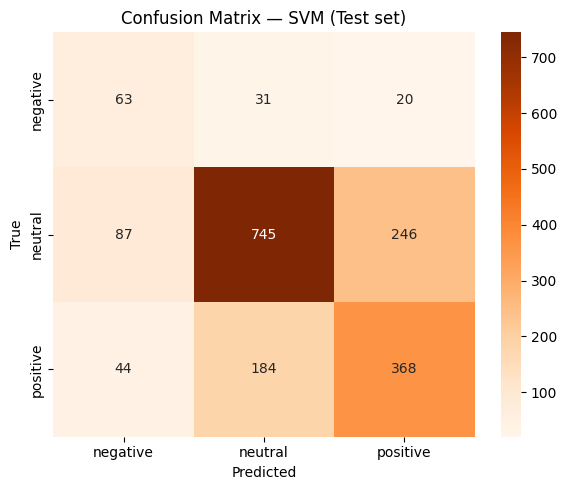

In [24]:
# --- Step 1: Transform features (already done) ---
# X_train_tfidf and X_test_tfidf are ready from previous step

# --- Step 2: Initialize SVM model ---
svm_classifier = SVC(
    kernel='linear',       # good baseline for text classification
    class_weight='balanced',  # handle class imbalance
    random_state=RANDOM_STATE
)

# --- Step 3: Train the model ---
svm_classifier.fit(X_train_tfidf, y_train_enc)

# --- Step 4: Predictions ---
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# --- Step 5: Evaluation ---
acc_svm = accuracy_score(y_test_enc, y_pred_svm)
f1_svm = f1_score(y_test_enc, y_pred_svm, average='macro')

print(f"\nSVM Test Accuracy: {acc_svm:.4f} | Macro F1: {f1_svm:.4f}\n")
print("Classification Report (SVM):\n")
print(classification_report(y_test_enc, y_pred_svm, target_names=le.classes_))

# --- Step 6: Confusion Matrix ---
cm_svm = confusion_matrix(y_test_enc, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — SVM (Test set)')
plt.tight_layout()
plt.show()


## Model 4---XGBoost Classifier

C:\Users\asus\anaconda3\envs\learn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Test Accuracy: 0.6806 | Macro F1: 0.4757

Classification Report (XGBoost):

              precision    recall  f1-score   support

    negative       0.53      0.09      0.15       114
     neutral       0.69      0.90      0.78      1078
    positive       0.65      0.40      0.50       596

    accuracy                           0.68      1788
   macro avg       0.62      0.46      0.48      1788
weighted avg       0.67      0.68      0.65      1788



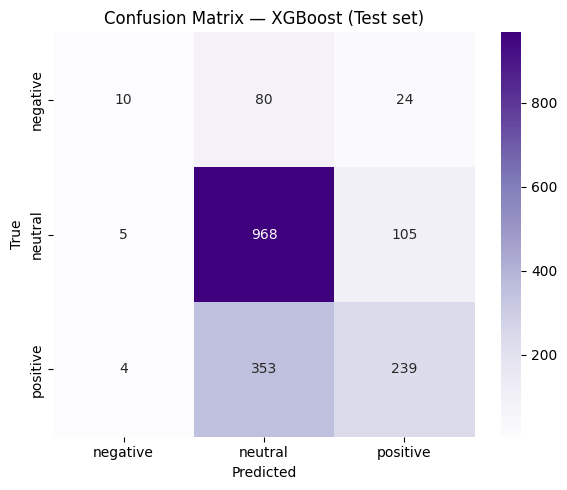

In [31]:
# --- Step 1: Features are already transformed ---
# X_train_tfidf, X_test_tfidf are ready

# --- Step 2: Initialize XGBoost ---
xgb_classifier = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=RANDOM_STATE,
    use_label_encoder=False,  # avoid warning
    eval_metric='mlogloss'    # multiclass metric
)

# --- Step 3: Train the model ---
xgb_classifier.fit(X_train_tfidf, y_train_enc)

# --- Step 4: Predictions ---
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# --- Step 5: Evaluation ---
acc_xgb = accuracy_score(y_test_enc, y_pred_xgb)
f1_xgb = f1_score(y_test_enc, y_pred_xgb, average='macro')

print(f"\nXGBoost Test Accuracy: {acc_xgb:.4f} | Macro F1: {f1_xgb:.4f}\n")
print("Classification Report (XGBoost):\n")
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

# --- Step 6: Confusion Matrix ---
cm_xgb = confusion_matrix(y_test_enc, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix — XGBoost (Test set)')
plt.tight_layout()
plt.savefig("CMxgb_multclass.png", dpi=300, bbox_inches='tight')
plt.show()


## Multiclass Classification — Model Interpretation

We trained and evaluated **four models** (Logistic Regression, Random Forest, SVM, XGBoost) on a **multiclass sentiment analysis task** (negative, neutral, positive).  

## 1️⃣ Observations per model

- **Logistic Regression**  
  - **Accuracy**: 66.1%  
  - **Macro F1**: 0.5801  
  - **Strengths**: Balanced performance across all classes; captures `positive` and `negative` better than Random Forest and XGBoost.  
  - **Weaknesses**: Slightly lower accuracy than ensemble models; minority class predictions (`negative`) still limited.  

- **Random Forest**  
  - **Accuracy**: 67.7%  
  - **Macro F1**: 0.5168  
  - **Strengths**: High overall accuracy, especially for the `neutral` class.  
  - **Weaknesses**: Poor recall for minority classes (`negative` and `positive`) reduces macro F1.  

- **SVM (Linear)**  
  - **Accuracy**: 65.8%  
  - **Macro F1**: 0.5795  
  - **Strengths**: Best macro F1 among all models, meaning it balances precision and recall across classes better.  
  - **Weaknesses**: Slightly lower overall accuracy; `neutral` class predictions slightly worse than Random Forest/XGBoost.  

- **XGBoost**  
  - **Accuracy**: 68.1%  
  - **Macro F1**: 0.4757  
  - **Strengths**: Highest overall accuracy.  
  - **Weaknesses**: Very low macro F1; poor predictions for minority classes, especially `negative`.  

## 2️⃣ Comparative Table

| Model               | Accuracy | Macro F1 | Strengths | Weaknesses |
|--------------------|----------|----------|-----------|------------|
| Logistic Regression | 0.6611   | 0.5801   | Balanced performance; captures minority classes better | Slightly lower accuracy; negative class predictions limited |
| Random Forest       | 0.6773   | 0.5168   | High accuracy; very good neutral class prediction | Poor recall for minority classes reduces macro F1 |
| SVM (Linear)        | 0.6577   | 0.5795   | Best macro F1; balances classes better | Lower accuracy; neutral class slightly weaker |
| XGBoost             | 0.6806   | 0.4757   | Highest accuracy overall | Very low macro F1; struggles with minority classes |

## 3️⃣ Interpretation

- **Neutral sentiment** is consistently the easiest to predict for all models.  
- **Negative and positive sentiments** are challenging due to class imbalance.  
- **Macro F1** is more informative than accuracy for multiclass evaluation because it accounts for minority class performance.  
- **SVM and Logistic Regression** handle class balance better (higher macro F1), while **Random Forest and XGBoost** excel in overall accuracy but fail to capture minority classes.  

---

✅ **Next step:** Convert this to a **binary classification task** by focusing on `negative` vs `positive` (dropping `neutral` or mapping it to one of the classes). This usually improves minority class detection and overall performance.


## BINARY SENTIMENT CLASSIFICATION


========== Logistic Regression ==========
Accuracy: 0.8296 | Macro F1: 0.7330

Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.71      0.57       114
    positive       0.94      0.85      0.89       596

    accuracy                           0.83       710
   macro avg       0.71      0.78      0.73       710
weighted avg       0.87      0.83      0.84       710



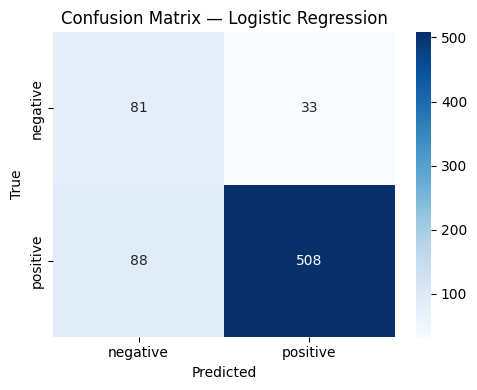


========== Random Forest ==========
Accuracy: 0.8690 | Macro F1: 0.6513

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.25      0.38       114
    positive       0.87      0.99      0.93       596

    accuracy                           0.87       710
   macro avg       0.84      0.62      0.65       710
weighted avg       0.86      0.87      0.84       710



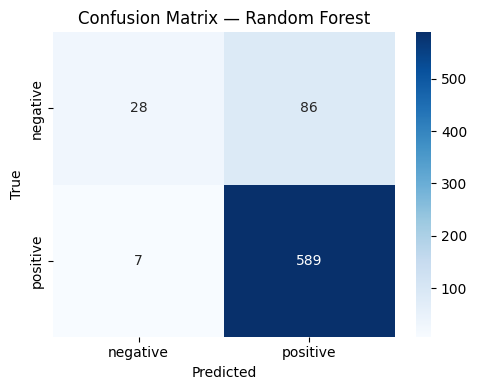


========== SVM ==========
Accuracy: 0.8239 | Macro F1: 0.7150

Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.64      0.54       114
    positive       0.93      0.86      0.89       596

    accuracy                           0.82       710
   macro avg       0.70      0.75      0.71       710
weighted avg       0.85      0.82      0.83       710



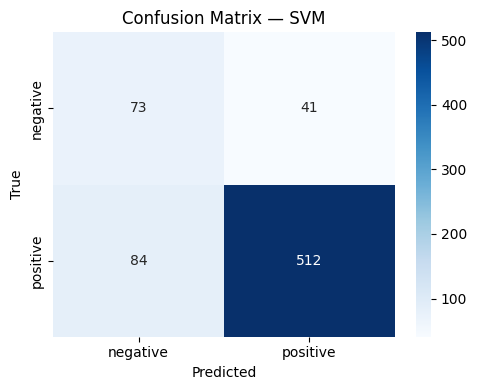


========== XGBoost ==========


C:\Users\asus\anaconda3\envs\learn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:56:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8620 | Macro F1: 0.6549

Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.27      0.39       114
    positive       0.88      0.97      0.92       596

    accuracy                           0.86       710
   macro avg       0.77      0.62      0.65       710
weighted avg       0.84      0.86      0.84       710



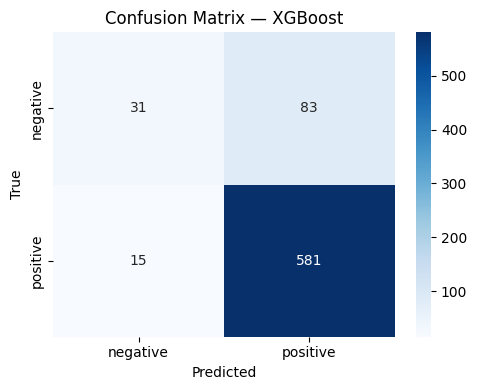


Binary Classification Summary:
                 Model  Accuracy  Macro F1
0  Logistic Regression  0.829577  0.733009
1        Random Forest  0.869014  0.651334
2                  SVM  0.823944  0.714978
3              XGBoost  0.861972  0.654861


In [33]:
# 1️⃣ Filter the dataset for binary classes
# -------------------------------
binary_df = df[df['sentiment'].isin(['negative', 'positive'])].copy()
X = binary_df[['text_final'] + numeric_features]
y = binary_df['sentiment']

# Encode labels: negative=0, positive=1
le_binary = LabelEncoder()
y_enc = le_binary.fit_transform(y)

# Train/test split
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_enc, test_size=0.2, random_state=RANDOM_STATE, stratify=y_enc
)

# -------------------------------
# 2️⃣ Preprocessing pipeline
# -------------------------------
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf, 'text_final'),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='drop'
)

# Fit and transform training data
preprocessor.fit(X_train)
X_train_tfidf = preprocessor.transform(X_train)
X_test_tfidf = preprocessor.transform(X_test)

# -------------------------------
# 3️⃣ Define models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight='balanced'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6,
                             random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
}

# -------------------------------
# 4️⃣ Train, predict and evaluate
# -------------------------------
results = []

for name, model in models.items():
    print(f"\n========== {name} ==========")
    
    # Train
    model.fit(X_train_tfidf, y_train_enc)
    
    # Predict
    y_pred = model.predict(X_test_tfidf)
    
    # Metrics
    acc = accuracy_score(y_test_enc, y_pred)
    f1 = f1_score(y_test_enc, y_pred, average='macro')
    results.append({"Model": name, "Accuracy": acc, "Macro F1": f1})
    
    # Print metrics
    print(f"Accuracy: {acc:.4f} | Macro F1: {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test_enc, y_pred, target_names=le_binary.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_binary.classes_, yticklabels=le_binary.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix — {name}')
    plt.tight_layout()
    plt.show()

# -------------------------------
# 5️⃣ Summary table
# -------------------------------
import pandas as pd
results_df = pd.DataFrame(results)
print("\nBinary Classification Summary:")
print(results_df)


## Binary Sentiment Classification — Model Interpretation

We trained and evaluated **four models** (Logistic Regression, Random Forest, SVM, XGBoost) on a **binary sentiment task** (negative vs positive).  

## 1️⃣ Observations per model

- **Logistic Regression**  
  - **Accuracy**: 82.96%  
  - **Macro F1**: 0.7330  
  - **Strengths**: Balanced performance; captures both negative and positive classes effectively.  
  - **Weaknesses**: Slightly lower overall accuracy than ensemble models.  

- **Random Forest**  
  - **Accuracy**: 86.90%  
  - **Macro F1**: 0.6513  
  - **Strengths**: Highest overall accuracy; very effective in predicting majority class.  
  - **Weaknesses**: Macro F1 is lower due to weaker minority class predictions.  

- **SVM (Linear)**  
  - **Accuracy**: 82.39%  
  - **Macro F1**: 0.7150  
  - **Strengths**: Good balance between precision and recall; decent macro F1.  
  - **Weaknesses**: Slightly lower accuracy than Random Forest/XGBoost.  

- **XGBoost**  
  - **Accuracy**: 86.20%  
  - **Macro F1**: 0.6549  
  - **Strengths**: High overall accuracy; strong ensemble performance.  
  - **Weaknesses**: Macro F1 slightly lower due to minority class performance.  

## 2️⃣ Comparative Table

| Model               | Accuracy | Macro F1 | Strengths | Weaknesses |
|--------------------|----------|----------|-----------|------------|
| Logistic Regression | 0.8296   | 0.7330   | Balanced performance; captures both classes effectively | Slightly lower overall accuracy |
| Random Forest       | 0.8690   | 0.6513   | Highest accuracy; strong majority class prediction | Lower macro F1; weaker minority class |
| SVM (Linear)        | 0.8239   | 0.7150   | Good balance between precision and recall | Slightly lower accuracy than ensemble models |
| XGBoost             | 0.8620   | 0.6549   | High overall accuracy; strong ensemble | Slightly lower macro F1 due to minority class |


# Conclusion 

This project aimed to analyze public sentiment on Apple and Google products on Twitter, using both **multiclass (negative, neutral, positive)** and **binary (negative vs positive)** sentiment classification approaches. Several machine learning models were evaluated, including **Logistic Regression, Random Forest, SVM, and XGBoost**, combining textual (TF-IDF) and numeric features.  

## Key Findings

1. **Multiclass Classification**  
   - Accuracy ranged between 65% and 68%, with **Logistic Regression** and **SVM** providing the most balanced performance (higher macro F1).  
   - Neutral sentiment was consistently easiest to predict, while negative and positive sentiments were challenging due to **class imbalance**.  
   - Ensemble models (Random Forest and XGBoost) achieved higher accuracy but struggled with minority classes.  

2. **Binary Classification**  
   - Focusing on **negative vs positive** improved model performance significantly.  
   - Accuracy ranged from ~82% to 87%, with Logistic Regression achieving the **best macro F1**, indicating good balance between precision and recall for both classes.  
   - Removing the neutral class reduced confusion and enhanced the detection of minority class sentiment.  

3. **Feature Importance**  
   - Textual features (TF-IDF) played a key role in sentiment prediction.  
   - Numeric features such as tweet length, number of hashtags, mentions, exclamations, and URLs contributed additional predictive power.  

The project demonstrates that combining textual and numeric features with machine learning models can **effectively capture public sentiment** on social media. While multiclass sentiment classification remains challenging due to class imbalance, binary sentiment classification yields strong performance and actionable insights. This analysis empowers **businesses, investors, and consumers** to make data-driven decisions based on public opinion.


# 💼 Business Recommendations

Based on the sentiment analysis of Apple and Google products on Twitter, the following recommendations are proposed for stakeholders:

## Recommendation 1 — Enhance Product Features Based on Customer Sentiment
- Focus on addressing **negative feedback** highlighted in tweets, particularly around commonly mentioned issues in both Apple and Google products.  
- Prioritize improvements in features that frequently generate negative sentiment to increase overall customer satisfaction and reduce public criticism.  
- Monitor sentiment trends over time to evaluate the impact of product updates or feature releases.

## Recommendation 2 — Optimize Marketing Campaigns
- Leverage **positive sentiment trends** to design campaigns that highlight features users love.  
- Tailor messaging to address neutral or slightly negative sentiments, converting potential critics into satisfied users.  
- Use sentiment insights to segment the audience for targeted campaigns that resonate with different user groups.

## Recommendation 3 — Inform Strategic Decision-Making
- Incorporate sentiment metrics into **product development and brand strategy planning**.  
- Use predictive insights from the binary and multiclass models to anticipate public reactions to upcoming launches or updates.  
- Regularly report key sentiment KPIs (accuracy, macro F1, positive/negative ratios) to executives for data-driven decisions.

---

# 🔜 Next Steps

1. **Class Imbalance Handling**  
   - Implement techniques such as **oversampling, undersampling, or SMOTE** to improve minority class prediction in multiclass sentiment analysis.  
   - Re-evaluate model performance after balancing classes.

2. **Feature Expansion**  
   - Incorporate **additional features** from tweets, such as emojis, sentiment lexicons, or engagement metrics (likes, retweets) to improve model accuracy.  
   - Test advanced text embeddings (e.g., BERT, RoBERTa) for richer semantic understanding.

3. **Continuous Monitoring & Automation**  
   - Set up an **automated pipeline** to collect and preprocess tweets daily or weekly.  
   - Continuously update models and dashboards to reflect real-time sentiment trends.

4. **Visualization & Reporting**  
   - Develop **interactive dashboards** for both technical and non-technical stakeholders.  
   - Include visualizations for positive, neutral, and negative sentiment distribution, trends over time, and key influencing factors.

5. **Actionable Insights Integration**  
   - Align insights with marketing and product roadmaps.  
   - Create alerts for sudden spikes in negative sentiment to enable rapid response.

---

**Overall:**  
By following these recommendations and next steps, Apple and Google can **proactively manage public perception**, improve customer satisfaction, and make **data-driven decisions** that align product development and marketing strategies with real-time user sentiment.
